## Deuflhard Function

In [ ]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging

  Activating project at `~/globtim`


In [2]:
# Constants and Parameters
const n, a, b = 2, 7, 5
const scale_factor = a / b  # maybe it should be a parameter.
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [18]:
d = 22 # Initial Degree 
SMPL = 120 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
                dim=n,
                center=[0.0, 0.0],
                GN=SMPL,
                sample_range=scale_factor,
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);


current L2-norm: 0.0007947312396844739
current L2-norm: 0.0006783442396031114


In [19]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=false,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=true)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR)

Tracking 441 paths...   0%|▏                            |  ETA: 0:06:43



Tracking 441 paths... 100%|█████████████████████████████| Time: 0:00:01
  # paths tracked:                  441
  # non-singular solutions (real):  441 (15)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         441 (15)
Tracking 441 paths...   0%|▏                            |  ETA: 0:06:25



Tracking 441 paths... 100%|█████████████████████████████| Time: 0:00:01
  # paths tracked:                  441
  # non-singular solutions (real):  441 (15)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         441 (15)


Row,x1,x2,z
,Float64,Float64,Float64
1,-0.256604,1.01626,1.02836e-8
2,-0.741095,0.741095,2.5722e-7
3,0.459957,0.459957,2.47007
4,-1.01626,0.256604,1.02836e-8
5,2.33624e-13,-1.79609e-14,4.0
6,1.01626,-0.256604,1.02836e-8
7,-0.459957,-0.459957,2.47007
8,0.741095,-0.741095,2.5722e-7
9,0.256604,-1.01626,1.02836e-8


In [20]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.001);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.001);

Processing point 1 of 15
Optimization has converged within bounds: ✓
Processing point 2 of 15
Optimization has converged within bounds: ✓
Processing point 3 of 15
Optimization has converged within bounds: ✓
Processing point 4 of 15
Optimization has converged within bounds: ✓
Processing point 5 of 15
Optimization has converged within bounds: ✓
Processing point 6 of 15
Optimization has converged within bounds: ✓
Processing point 7 of 15
Optimization has converged within bounds: ✓
Processing point 8 of 15
Optimization has converged within bounds: ✓
Processing point 9 of 15
Optimization has converged within bounds: ✓
Processing point 10 of 15
Optimization has converged within bounds: ✓
Processing point 11 of 15
Optimization has converged within bounds: ✓
Processing point 12 of 15
Optimization has converged within bounds: ✓
Processing point 13 of 15
Optimization has converged within bounds: ✓
Processing point 14 of 15
Optimization has converged within bounds: ✓
Processing point 15 of 15
Opt

In [23]:
using CairoMakie
CairoMakie.activate!

activate! (generic function with 1 method)

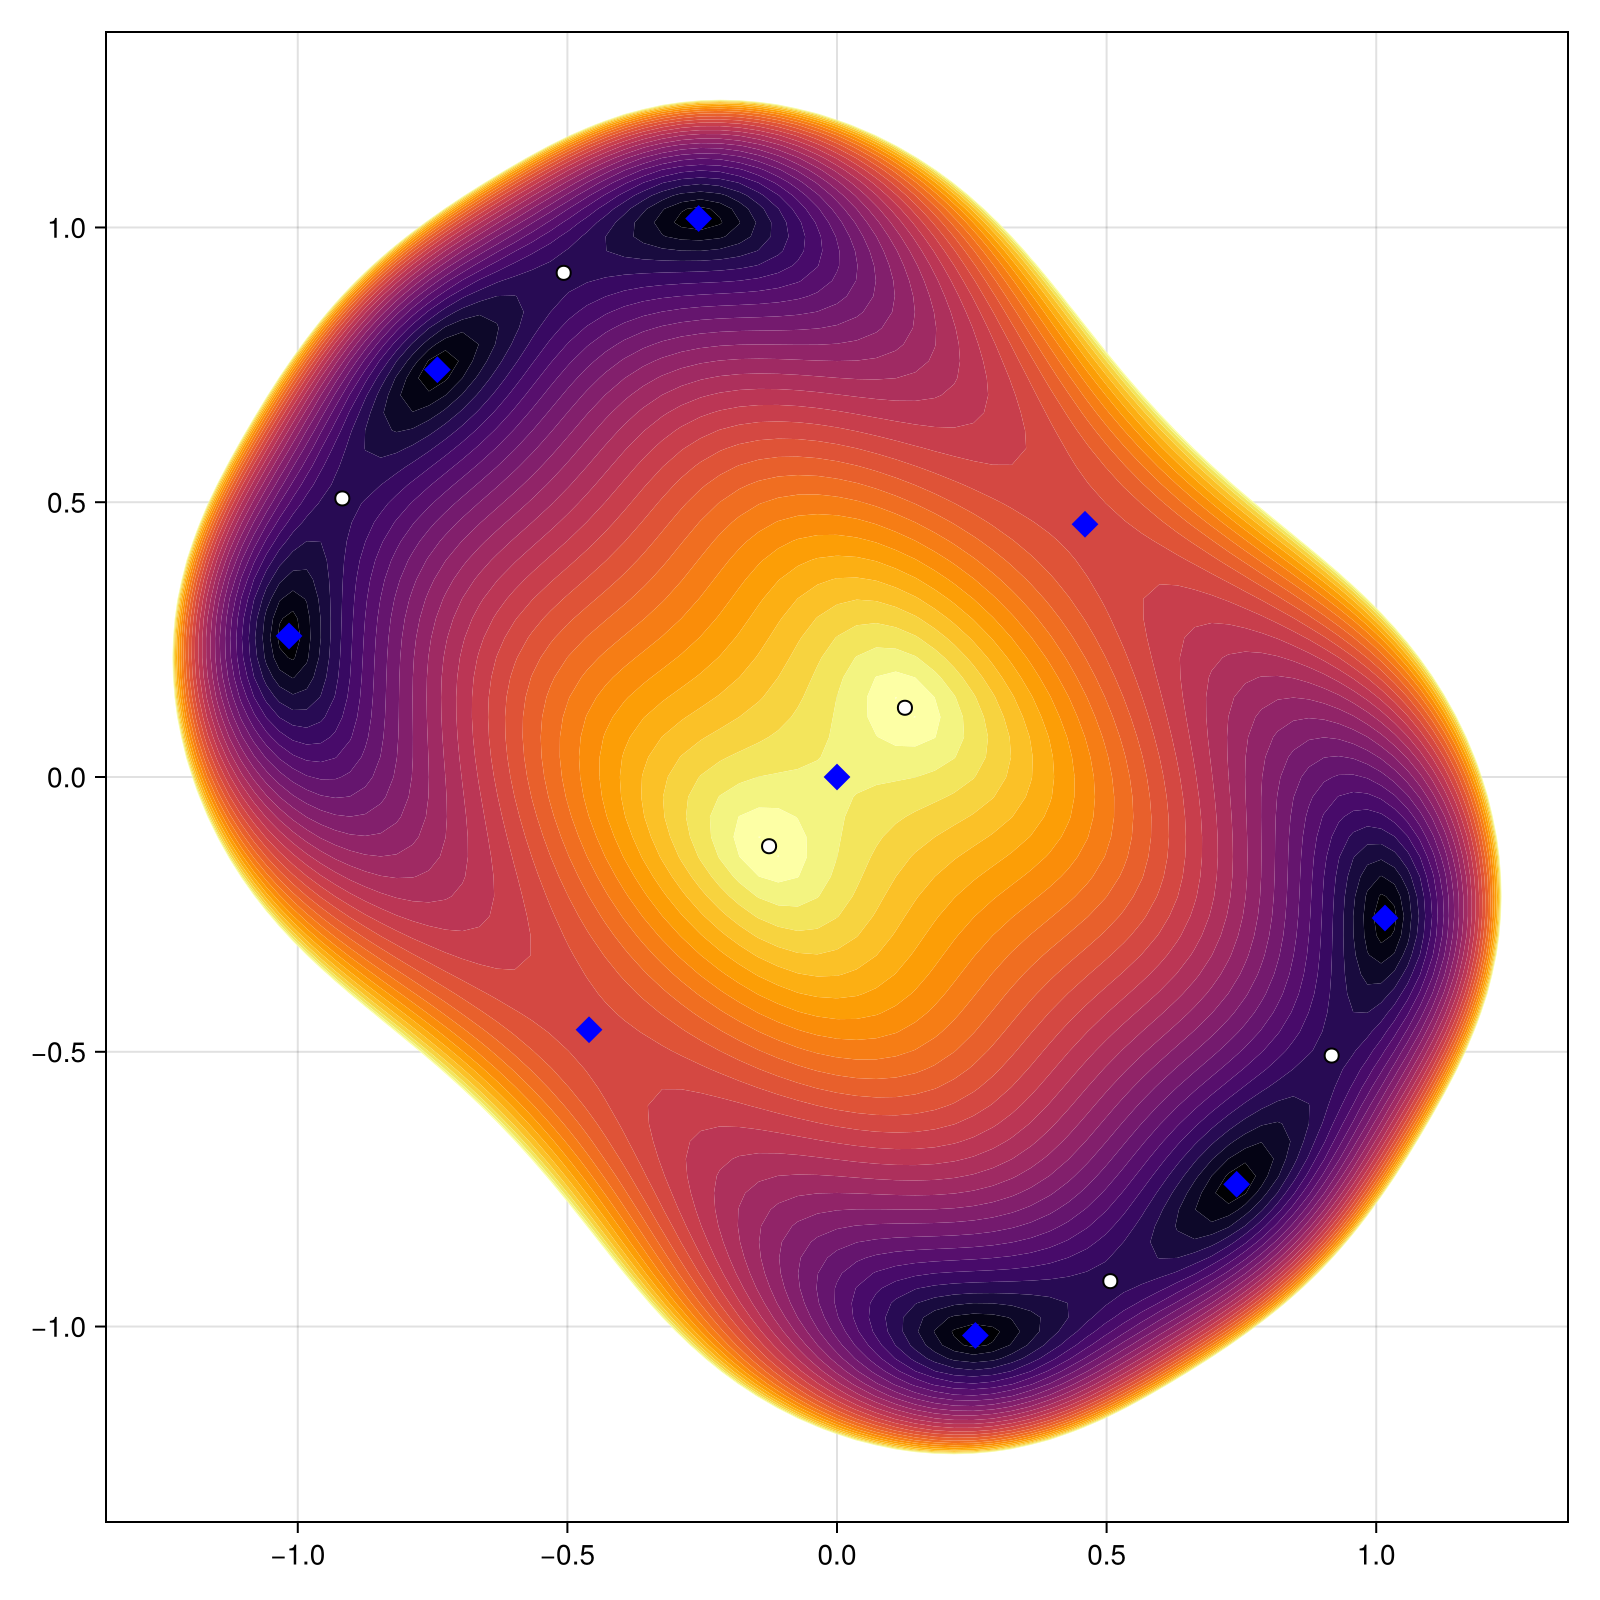

In [26]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size=(800, 800))

In [7]:
# fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true, figure_size = (800, 800))

In [27]:
save("Deuflhard_w_22.pdf", fig_1)

CairoMakie.Screen{PDF}


In [9]:
using GLMakie
GLMakie.activate!

┌ Warning: Error requiring `GLMakie` from `Globtim`
│   exception = (LoadError("/Users/ghscholt/globtim/src/LevelSetViz.jl", 3, ArgumentError("Package Globtim does not have Colors in its dependencies:\n- You may have a partially installed environment. Try `Pkg.instantiate()`\n  to ensure all packages in the environment are installed.\n- Or, if you have Globtim checked out for development and have\n  added Colors as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with Globtim")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x0000000116039aaf, Ptr{Nothing} @0x0000000116039ce7, Ptr{Nothing} @0x00000001015567ff, Ptr{Nothing} @0x000000011586c783, Ptr{Nothing} @0x000000011586c7ff, Ptr{Nothing} @0x000000010157e27b, Ptr{Nothing} @0x000000010157d297, Ptr{Nothing} @0x000000010157d98f, Ptr{Nothing} @0x000000010157e923, Ptr{Nothing} @0x0000000115cb761f, Ptr{Nothing} @0x0000000366f703e7, Ptr{No

activate! (generic function with 1 method)

In [21]:
fig_3d = plot_polyapprox_3d(
    pol_cheb, 
    TR, 
    df_cheb, 
    df_min_cheb,
    z_limits=(-1., 4.2), 
    figure_size = (1600, 1600), 
    fade = true, 
    z_cut = .0
)
display(fig_3d)

GLMakie.Screen(...)

In [ ]:
# save("deuflhard_cheb_22_3d_1.png", fig_3d)